In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

## Резкое погружение в финансовый мир 

В финансах есть много разных инструментов: акции, облигации, деривативы и т.п. 

В основе огромного бесчисленного числа современных экономических теорий лежит гипотеза о том, что движение котировок подчиняется логнормальному распределению. То есть доходности распределены нормально. На всём этом строится пресловутый Блэк-Шоулз с их Нобелевской премией. В реальности всё гораздо сложнее и нам предстоит в этом убедиться. 


## Добыча финансовых данных

Для того, чтобы погрузиться в мир финансов, нам нужно раздобыть финансовых данных. В R для всего есть пакеты, верно? Воспользуемся пакетом `quantmod`, чтобы достать данных с Yahoo.Finance. 

In [2]:
install.packages("quantmod")  # Устанавливаем пакет, если его нет 
# Внимание: устанавливать пакет надо один раз в жизни! 
# После установки пакета можно эту строчку удалить навсегода. 

Installing package into ‘/usr/local/lib/R/3.4/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘TTR’



In [4]:
library(quantmod) # Эта команда подключает пакет
# Внимание: подключать пакет нужно каждый раз, когда
# вы хотите использовать его в своём скрипте

Получаем данные о котировках apple с сайта Yahoo. Команда `getSymbols` умеет делать это.

In [6]:
getSymbols("AAPL", from="2015-01-01")

[1] "AAPL"

In [19]:
data <- AAPL
head(data)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2015-01-02    111.39    111.44   107.35     109.33    53204600      103.0742
2015-01-05    108.29    108.65   105.41     106.25    64285500      100.1704
2015-01-06    106.54    107.43   104.63     106.26    65797100      100.1798
2015-01-07    107.20    108.20   106.70     107.75    40105900      101.5846
2015-01-08    109.23    112.15   108.70     111.89    59364500      105.4877
2015-01-09    112.67    113.25   110.21     112.01    53699500      105.6008

In [20]:
dim(data) # размеры таблички

[1] 793   6

Как видите, цены бывают разными. Открытия, закрытия, самая высокая и низкая. 

In [ ]:
# график с динамикой цен 
ggplot(data)

In [26]:
price <- as.vector(prices$AAPL.Open)
price[1:5]

[1] 111.39 108.29 106.54 107.20 109.23

Перейдём от цен к изменению цен, то есть к доходностям:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Команда `diff` вернёт нам вектор из приращений в каждой точке. 

In [27]:
diff(price)[1:5]

[1] -3.099998 -1.750000  0.659996  2.030006  3.439995

Хотелось бы теперь просто разделить его на значения цен, но нельзя - они разной длины. Поэтому придётся выбросить первый элемент из вектора цен. 

In [28]:
R <- diff(price)/price[-1]
R[1:5]

[1] -0.028626817 -0.016425755  0.006156679  0.018584692  0.030531597

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


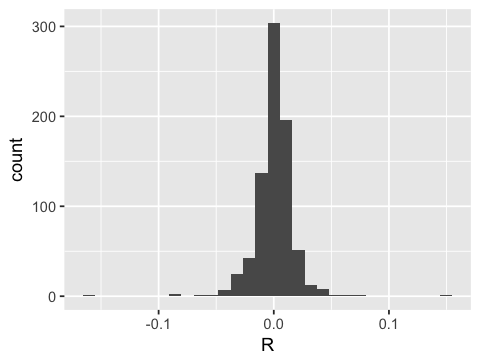

In [29]:
qplot(R)

In [31]:
mean(R)

[1] 0.0004394648

In [32]:
sd(R)

[1] 0.01680587

Возникает вопрос. Имеют ли доходности нормальное распределение. Чтобы дать ответ на этот вопрос, обычно, проверяют гипотезы.  Проверим 

In [34]:
shapiro.test(R)


	Shapiro-Wilk normality test

data:  R
W = 0.85082, p-value < 2.2e-16


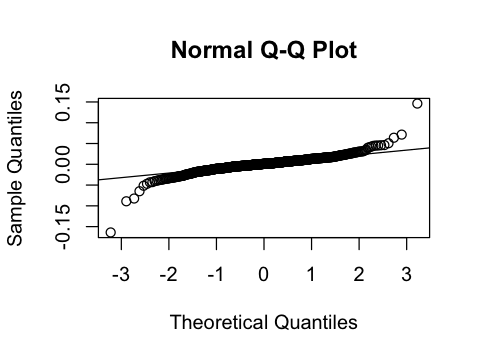

In [36]:
qqnorm(R)
qqline(R)

Тяжёлые хвосты или лёгкие? Что это значит? 

Финансовые продукты характеризуются двумя основными характеристикам – доходностью и риском. С доходностью все довольно понятно – это процентное изменение стоимости за некоторый промежуток времени. Чтобы не быть голословным, будем изучать все на каких-нибудь примерах. Возьмем котировки компании Tesla Motors за 2014 год:

In [37]:
library(quantmod)
getSymbols("TSLA", from="2014-01-01", to="2015-01-01")

[1] "TSLA"

Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <90>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <ba>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <d1>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <86>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <b8>”Warning message in title(...):
“ошибка конвертации 'Акции Tesla Motors' в 'mbcsToSbcs': точка заменена на <d0>”W

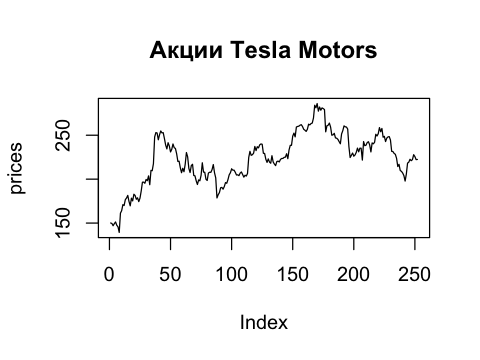

In [38]:
prices <- as.numeric(Ad(TSLA))
plot(prices, type="l", main="Акции Tesla Motors")

Как найти годовую доходность? Это просто процентное изменение последней точки к первой:

In [39]:
tail(prices, 1)/head(prices, 1) - 1

[1] 0.4817455

Это много? Почему?

Но вот что считать мерой риска? Мы рассмотрим 4 популярные характеристики, а дальше сосредоточимся на двух.

## Стандартное отклонение доходности 

Название говорит само за себя. Возьмём ряд доходностей, найжём его стандартное отклонение. 

In [40]:
ret <- diff(prices)/head(prices, -1)
mean(ret)

[1] 0.002024531

In [41]:
sd(ret)

[1] 0.03049802

А это много? Вкладываем деньги или нет? 

__NB:__ Сравнивать акции на основе стандартного отклонения можно при равных доходностях. А чтобы сравнивать разные акции нужно использовать комбинированные метрики. Например, Коэффициент Шарпа – отношение ожидаемой доходности к ее стандартному отклонению:

In [43]:
mean(ret)/sd(ret)

[1] 0.06638238

Такой метод оценки риска хорош, так как прост и понятен, но есть пара минусов. Во-первых стандартное отклонение ничего не говорит об экстремальности распределения. Во-вторых, стандартное отклонение не естественно, то есть на интуитивном уровне не понятно.

## Максимальная просадка 

Максимальная просадка (maximum drawdown) – это то, насколько сильно просел наш актив после максимального влета. Для графика выше максимальная просадка - это разница между максимальным значением около 170 и минимальным около 250. В R есть готовые способы найти максимальную просадку. Но мы же хотим все прочувствовать сами. Алгоритм:

1. Говорим, что максимальная просадка равна 0.
2. Берем первую точку и объявляем ее максимумом цены.
3. Идем к следующей точке.
    * Если она больше максимума, то обновляем максимум.
    * Если меньше, то считаем в ней просадку. Если просадка больше максимальной, то обновляем максимальную
4. Повторяем шаг 3, пока не дойдем до конца.

In [44]:
maxDD <- 0
maxPr <- prices[1]

for (i in 2:length(prices)) { # Проходим по всем точкам, начиная со второй
  if (prices[i] > maxPr) { # Проверяем не больше ли она текущего максимума
    maxPr <- prices[i] # Если больше, то меняем максимум на эту точку
  } else {
    DD <- (maxPr - prices[i])/maxPr # А иначе считаем просадку
    if (DD > maxDD) { # И смотрим не больше ли эта просадка максимальной
      maxDD <- DD # А если больше, то меняем значение максимальной просадки
      }
  }
}
maxPr

[1] 286.04

In [45]:
maxDD

[1] 0.3084534

Чем хороша эта мера? А чем плоха?



## Value-at-Risk

… или статистика 16:15. Value-at-Risk на каком-либо уровне (скажем, 5%) – это просто квантиль на уровне 5%. То есть это такая доходность, что в 95% случаев у нас дела будут лучше. Вот если сейчас не понятно, то точно стоит меня прервать. Считаем ее элементарно:

In [46]:
quantile(ret, 0.05)

5% 
-0.04236016

In [47]:
sort(ret)[0.05*length(ret)]

[1] -0.04307281

VaR хорош, так как не требует гипотез о хоть какой-либо форме распределения и описывает именно ту часть распределения, которую мы боимся. Но VaR - это лучшее из 5% худших случаев. А что лежит в тех 5%?…

## Expected shortfall

Он же ES, conditional value at risk (CVaR), average value at risk (AVaR), и expected tail loss (ETL). Но мы будем говорить ES. ES - Это среднее значение по всем тем точкам, что оказались левее VaR, То есть среднее по худшим 5%. Считаем:

In [48]:
mean(ret[ret <= quantile(ret, 0.05)]) # Попросите меня разобрать эту формулу подробнее.

[1] -0.06072323

Чем ES хуже VaR? А чем лучше?

## Кто побеждает? 

Да никто. Все рассуждения о риске – это попытки запихнуть функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. В лучшем случае посредственны. А к чему это приведет, можно прочитать в этой книге (обязательно к прочтению для тех, кто видит себя трейдером, и занятное чтиво для остальных).

А чем будем пользоваться мы? VaR и иногда ES. И еще пару метрик появятся по ходу изложения курса.


Вот мы уже умеем находим VaR и понимаем, что это такое. Взяли цены акций за год, нашли квантиль 5%. И говорим, что в будущем акции будут вести себя так же. То есть занимаемся моделированием, предсказанием, алхимией. А значит нужно научиться проверять наши прогнозы.

### Тренировочная и тестовая выборка

Но сначала о методологии анализа данных. Если вы занимаетесь моделированием чего угодно на данных, то вам нужно иметь две выборки: тренировочную и тестовую. На тренировочной вы строите модель, а на тестовой должны проверить ее качество. Давайте на примерах.

### Кривая VaR

Поэтому когда мы найдем значение VaR, то верифицировать его мы должны будем на другой части наблюдений. У нас есть

In [49]:
length(ret)

[1] 251

наблюдение. Давайте на первых 150-ти наблюдениях найдем VaR, а на второй его оценим.

Разбиваем на две выборки:

In [50]:
train <- ret[1:150]
test  <- ret[151:length(ret)]

In [51]:
var <- quantile(train, 0.05)

Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <9a>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <d1>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <80>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <b8>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <b2>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(...):
“ошибка конвертации 'Кривая VaR' в 'mbcsTo

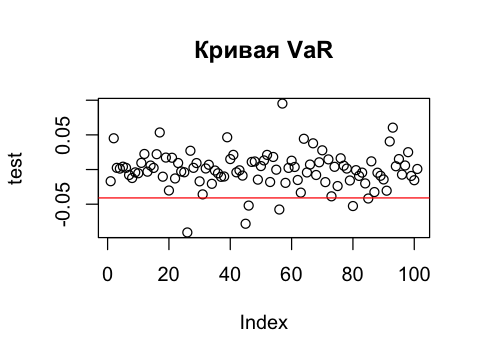

In [53]:
plot(test, type="p", main = "Кривая VaR")
abline(h = var, col="red")

Мы видим, что на деле 6 точек попали ниже кривой, а должны были:

https://rpubs.com/iezepov/e502lec2


In [ ]:
0.05*length(test)


## Авторские права и почиташки 

Курс Ильи Езепова по рискам и всяким другим прикольным штукам в R. На самом деле, вы ещё не готовы к этому курсу. Для того, чтобы успешно его освоить, надо уметь хорошо проверять гипотезы, а также немного подучить эконометрику. 

Однако, вы смело можете попробовать ознакомиться с лекцией 1, лекцией 2 и лекцией 5. Материалы из них я использовал для создания этой тетрадки. Иногда вплоть до копипасты. 

* [Лекция 1, вводная](https://rpubs.com/iezepov/e502lec1)
* [Лекция 2, кривая VaR, пакет ghyp и Монте-Карло](https://rpubs.com/iezepov/e502lec2)
* [Лекция 3 - разговоры о волатильности, GARCH и ARCH модели. ](https://rpubs.com/iezepov/e502lec3)
* [Лекция 4 - инвестируем в портфель и изучаем копулы.](https://rpubs.com/iezepov/e502lec4)
* [Лекция 5 - много разных картинок.](https://rpubs.com/iezepov/e502lec5)
* [Лекция 6 - моделирование хвостов и непараметриеские оценки.](https://rpubs.com/iezepov/e502lec6)
* [Лекция 7 - PCA, факторный анализ, кластеризация и многое другое.](https://rpubs.com/iezepov/e502lec7)
* [Лекция 8 - Временные ряды и панельные данные в R](https://rpubs.com/iezepov/e502lec8) 

Пусть ссылки на все эти лекции лежат тут. Когда вы морально будете готовы вникнуть в них, читайте! :) 



+ Книга кванты
+ Хулиномика 